---
# Step 0. Import Libraries

---

In [1]:
import os
from glob import glob
from tqdm import tqdm
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, auc)
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from ml_models.data_loader import *
from ml_models.training import *
from ml_models.evaluation_utils import *
import joblib
from joblib import Parallel, delayed
import pandas as pd

---
## Multi-Class Classification

In this notebook, after exploring the three-class classification setup, we now aim to classify the original target force levels ranging from 20 to 80 Nm.

---


In [2]:
VALSIZE = 0.2
RANDOM_STATE = 42
 
dataset_dir = "/Users/MA_Arash/MA_git/EIT_Thigh_Force_Estimation/Dataset/"

participants = ['P01','P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 
                'P10', 'P11', 'P12', 'P13', 'P14', 'P15']

folds = generate_random_folds(participants=participants, n_test=1, n_folds=5, seed=42)

class_names = ["20", "30", "40", "50", "60", "70", "80"]
n_classes = len(class_names)

print(f"Number of classes: {n_classes}")
print(f"Class names: {class_names}")

print(f"Fold 0: {folds[0]}")

Number of classes: 7
Class names: ['20', '30', '40', '50', '60', '70', '80']
Fold 0: (['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P12', 'P13', 'P14', 'P15'], ['P11'])


In [3]:
# Only One Fold is considered for Multi-Class Classification

fold_index = 0
X_train, y_train, _ = load_dataset(participant=folds[fold_index][0], paths=dataset_dir, z_score_norm="participant_meanfree", multi_class=True)

X_test, y_test, _ = load_dataset(participant=folds[fold_index][1],paths=dataset_dir, z_score_norm="participant_meanfree", multi_class=True)

# Split training into train and validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=VALSIZE, random_state=RANDOM_STATE)

Loading participants: ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P12', 'P13', 'P14', 'P15']
Normalization method: participant_meanfree


Loading data:   0%|          | 0/14 [00:00<?, ?it/s]

Loading data:   7%|▋         | 1/14 [00:00<00:06,  2.05it/s]

PP01: mean-free → global z-scoring
   before: mean=-0.000, std=0.019
   after:  mean=-0.000, std=1.000


Loading data:  14%|█▍        | 2/14 [00:01<00:08,  1.34it/s]

PP02: mean-free → global z-scoring
   before: mean=0.000, std=0.023
   after:  mean=0.000, std=1.000


Loading data:  21%|██▏       | 3/14 [00:02<00:10,  1.10it/s]

PP03: mean-free → global z-scoring
   before: mean=-0.000, std=0.017
   after:  mean=0.000, std=1.000


Loading data:  29%|██▊       | 4/14 [00:03<00:09,  1.05it/s]

PP04: mean-free → global z-scoring
   before: mean=-0.000, std=0.025
   after:  mean=-0.000, std=1.000


Loading data:  36%|███▌      | 5/14 [00:04<00:09,  1.06s/it]

PP05: mean-free → global z-scoring
   before: mean=-0.000, std=0.011
   after:  mean=0.000, std=1.000


Loading data:  43%|████▎     | 6/14 [00:05<00:08,  1.08s/it]

PP06: mean-free → global z-scoring
   before: mean=-0.000, std=0.024
   after:  mean=0.000, std=1.000


Loading data:  50%|█████     | 7/14 [00:06<00:07,  1.07s/it]

PP07: mean-free → global z-scoring
   before: mean=0.000, std=0.010
   after:  mean=-0.000, std=1.000


Loading data:  57%|█████▋    | 8/14 [00:07<00:06,  1.06s/it]

PP08: mean-free → global z-scoring
   before: mean=-0.000, std=0.021
   after:  mean=-0.000, std=1.000


Loading data:  64%|██████▍   | 9/14 [00:09<00:05,  1.08s/it]

PP09: mean-free → global z-scoring
   before: mean=-0.000, std=0.017
   after:  mean=0.000, std=1.000


Loading data:  71%|███████▏  | 10/14 [00:10<00:04,  1.09s/it]

PP10: mean-free → global z-scoring
   before: mean=-0.000, std=0.018
   after:  mean=-0.000, std=1.000


Loading data:  79%|███████▊  | 11/14 [00:11<00:03,  1.14s/it]

PP12: mean-free → global z-scoring
   before: mean=0.000, std=0.033
   after:  mean=-0.000, std=1.000


Loading data:  86%|████████▌ | 12/14 [00:12<00:02,  1.16s/it]

PP13: mean-free → global z-scoring
   before: mean=0.000, std=0.050
   after:  mean=-0.000, std=1.000


Loading data:  93%|█████████▎| 13/14 [00:13<00:01,  1.14s/it]

PP14: mean-free → global z-scoring
   before: mean=0.000, std=0.006
   after:  mean=0.000, std=1.000


Loading data: 100%|██████████| 14/14 [00:14<00:00,  1.06s/it]


PP15: mean-free → global z-scoring
   before: mean=-0.000, std=0.012
   after:  mean=0.000, std=1.000
Loading participants: ['P11']
Normalization method: participant_meanfree


Loading data: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

PP11: mean-free → global z-scoring
   before: mean=-0.000, std=0.013
   after:  mean=-0.000, std=1.000


In [8]:
svm_model = build_svm_pipeline(random_state=RANDOM_STATE)
svm_model = train_pipeline(svm_model, X_tr, y_tr)

In [9]:
joblib.dump(svm_model, 'final_result/multi_class/svm_model_fold0.pkl')

['final_result/multi_class/svm_model_fold0.pkl']

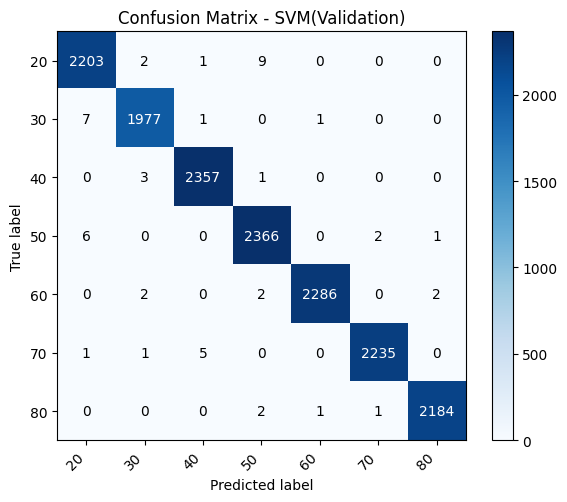

/Users/arash/anaconda3/envs/MA_Arash/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arash/anaconda3/envs/MA_Arash/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arash/anaconda3/envs/MA_Arash/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

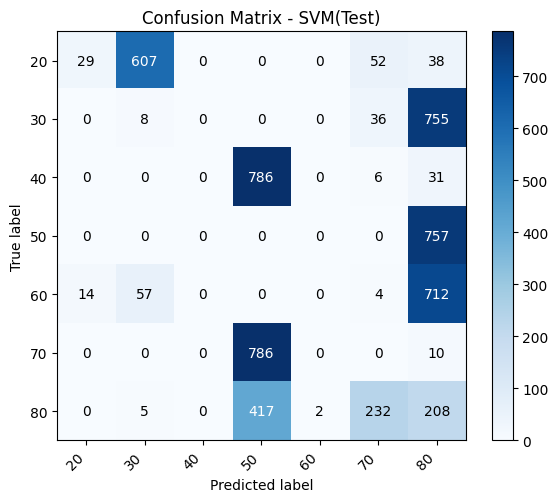

In [14]:
val_metrics = compute_metrics_no_roc(svm_model, X_val, y_val, n_classes, class_names)

plot_confusion_matrix(val_metrics['conf_matrix'], class_names,
                          title=f"Confusion Matrix - SVM(Validation)", save_path="final_result/multi_class/svm_multi_fold0.pdf")

# Evaluate test
test_metrics = compute_metrics_no_roc(svm_model, X_test, y_test, n_classes, class_names)
plot_confusion_matrix(test_metrics['conf_matrix'], class_names,
                          title=f"Confusion Matrix - SVM(Test)", save_path="final_result/multi_class/svm_multi_test_fold0.pdf")

In [15]:
print(val_metrics["class_report"])
print(test_metrics["class_report"])

              precision    recall  f1-score   support

          20       0.99      0.99      0.99      2215
          30       1.00      1.00      1.00      1986
          40       1.00      1.00      1.00      2361
          50       0.99      1.00      1.00      2375
          60       1.00      1.00      1.00      2292
          70       1.00      1.00      1.00      2242
          80       1.00      1.00      1.00      2188

    accuracy                           1.00     15659
   macro avg       1.00      1.00      1.00     15659
weighted avg       1.00      1.00      1.00     15659

              precision    recall  f1-score   support

          20       0.67      0.04      0.08       726
          30       0.01      0.01      0.01       799
          40       0.00      0.00      0.00       823
          50       0.00      0.00      0.00       757
          60       0.00      0.00      0.00       787
          70       0.00      0.00      0.00       796
          80       0.08 

## Global Normalization

In [16]:
fold_index = 0
X_train, y_train, _ = load_dataset(participant=folds[fold_index][0], paths=dataset_dir, z_score_norm="global", multi_class=True)

X_test, y_test, _ = load_dataset(participant=folds[fold_index][1],paths=dataset_dir, z_score_norm="global", multi_class=True)

# Split training into train and validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=VALSIZE, random_state=RANDOM_STATE)

Loading participants: ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P12', 'P13', 'P14', 'P15']
Normalization method: global


Loading data: 100%|██████████| 14/14 [00:16<00:00,  1.18s/it]


Applying GLOBAL z-score to entire dataset
   before: mean=0.098, std=0.095
   after:  mean=-0.000, std=1.000
Loading participants: ['P11']
Normalization method: global


Loading data: 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

Applying GLOBAL z-score to entire dataset
   before: mean=0.058, std=0.045
   after:  mean=-0.000, std=1.000


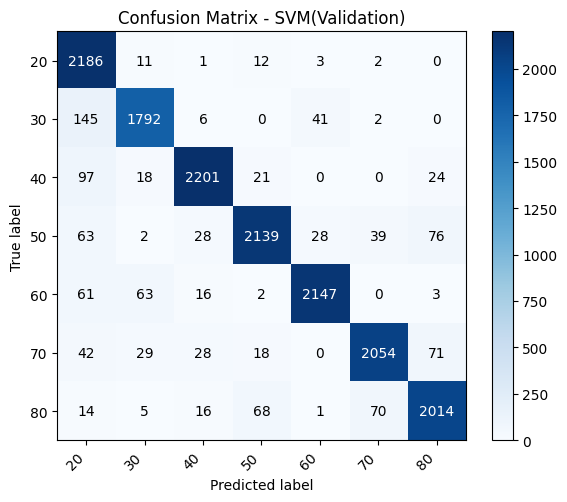

/Users/arash/anaconda3/envs/MA_Arash/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arash/anaconda3/envs/MA_Arash/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arash/anaconda3/envs/MA_Arash/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

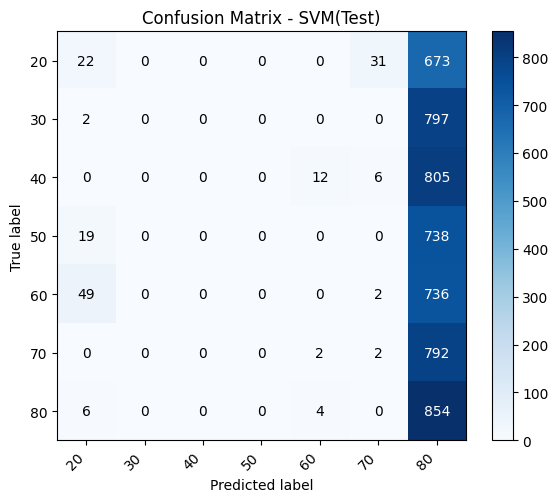

In [17]:
svm_model = build_svm_pipeline(random_state=RANDOM_STATE)
svm_model = train_pipeline(svm_model, X_tr, y_tr)
val_metrics = compute_metrics_no_roc(svm_model, X_val, y_val, n_classes, class_names)

plot_confusion_matrix(val_metrics['conf_matrix'], class_names,
                          title=f"Confusion Matrix - SVM(Validation)", save_path="final_result/multi_class/svm_multi_fold0.pdf")

# Evaluate test
test_metrics = compute_metrics_no_roc(svm_model, X_test, y_test, n_classes, class_names)
plot_confusion_matrix(test_metrics['conf_matrix'], class_names,
                          title=f"Confusion Matrix - SVM(Test)", save_path="final_result/multi_class/svm_multi_test_fold0.pdf")

----
# Random Forest

In [18]:
fold_index = 0
X_train, y_train, _ = load_dataset(participant=folds[fold_index][0], paths=dataset_dir, z_score_norm="participant_meanfree", multi_class=True)

X_test, y_test, _ = load_dataset(participant=folds[fold_index][1],paths=dataset_dir, z_score_norm="participant_meanfree", multi_class=True)

# Split training into train and validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=VALSIZE, random_state=RANDOM_STATE)

Loading participants: ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P12', 'P13', 'P14', 'P15']
Normalization method: participant_meanfree


Loading data:   7%|▋         | 1/14 [00:00<00:05,  2.18it/s]

PP01: mean-free → global z-scoring
   before: mean=-0.000, std=0.019
   after:  mean=-0.000, std=1.000


Loading data:  14%|█▍        | 2/14 [00:01<00:08,  1.37it/s]

PP02: mean-free → global z-scoring
   before: mean=0.000, std=0.023
   after:  mean=0.000, std=1.000


Loading data:  21%|██▏       | 3/14 [00:02<00:10,  1.09it/s]

PP03: mean-free → global z-scoring
   before: mean=-0.000, std=0.017
   after:  mean=0.000, std=1.000


Loading data:  29%|██▊       | 4/14 [00:03<00:09,  1.03it/s]

PP04: mean-free → global z-scoring
   before: mean=-0.000, std=0.025
   after:  mean=-0.000, std=1.000


Loading data:  36%|███▌      | 5/14 [00:04<00:09,  1.09s/it]

PP05: mean-free → global z-scoring
   before: mean=-0.000, std=0.011
   after:  mean=0.000, std=1.000


Loading data:  43%|████▎     | 6/14 [00:06<00:09,  1.18s/it]

PP06: mean-free → global z-scoring
   before: mean=-0.000, std=0.024
   after:  mean=0.000, std=1.000


Loading data:  50%|█████     | 7/14 [00:07<00:08,  1.19s/it]

PP07: mean-free → global z-scoring
   before: mean=0.000, std=0.010
   after:  mean=-0.000, std=1.000


Loading data:  57%|█████▋    | 8/14 [00:08<00:07,  1.18s/it]

PP08: mean-free → global z-scoring
   before: mean=-0.000, std=0.021
   after:  mean=-0.000, std=1.000


Loading data:  64%|██████▍   | 9/14 [00:09<00:06,  1.20s/it]

PP09: mean-free → global z-scoring
   before: mean=-0.000, std=0.017
   after:  mean=0.000, std=1.000


Loading data:  71%|███████▏  | 10/14 [00:11<00:04,  1.22s/it]

PP10: mean-free → global z-scoring
   before: mean=-0.000, std=0.018
   after:  mean=-0.000, std=1.000


Loading data:  79%|███████▊  | 11/14 [00:12<00:03,  1.26s/it]

PP12: mean-free → global z-scoring
   before: mean=0.000, std=0.033
   after:  mean=-0.000, std=1.000


Loading data:  86%|████████▌ | 12/14 [00:13<00:02,  1.33s/it]

PP13: mean-free → global z-scoring
   before: mean=0.000, std=0.050
   after:  mean=-0.000, std=1.000


Loading data:  93%|█████████▎| 13/14 [00:15<00:01,  1.25s/it]

PP14: mean-free → global z-scoring
   before: mean=0.000, std=0.006
   after:  mean=0.000, std=1.000


Loading data: 100%|██████████| 14/14 [00:16<00:00,  1.15s/it]


PP15: mean-free → global z-scoring
   before: mean=-0.000, std=0.012
   after:  mean=0.000, std=1.000
Loading participants: ['P11']
Normalization method: participant_meanfree


Loading data: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

PP11: mean-free → global z-scoring
   before: mean=-0.000, std=0.013
   after:  mean=-0.000, std=1.000


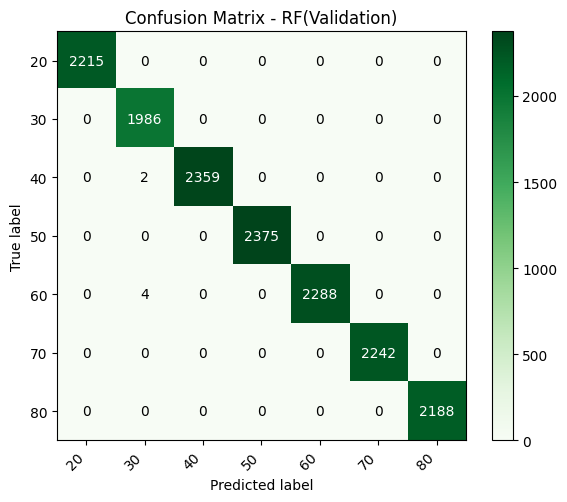

/Users/arash/anaconda3/envs/MA_Arash/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arash/anaconda3/envs/MA_Arash/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arash/anaconda3/envs/MA_Arash/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

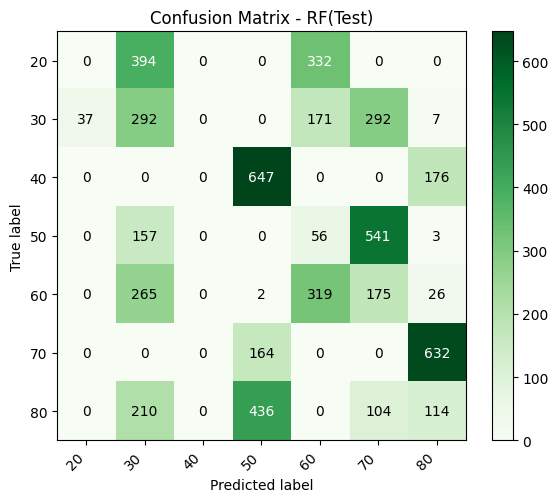

In [19]:
rf_pipeline = build_rf_pipeline(random_state=RANDOM_STATE)
rf_pipeline = train_pipeline(rf_pipeline, X_tr, y_tr)


val_metrics = compute_metrics_no_roc(rf_pipeline, X_val, y_val, n_classes, class_names)

plot_confusion_matrix(val_metrics['conf_matrix'], class_names,
                          title=f"Confusion Matrix - RF(Validation)", cmap="Greens", save_path="final_result/multi_class/rf_multi_fold0.pdf")

# Evaluate test
test_metrics = compute_metrics_no_roc(rf_pipeline, X_test, y_test, n_classes, class_names)
plot_confusion_matrix(test_metrics['conf_matrix'], class_names,
                          title=f"Confusion Matrix - RF(Test)", cmap="Greens", save_path="final_result/multi_class/rf_multi_fold0_test.pdf")

## Global Normalization

In [20]:
fold_index = 0
X_train, y_train, _ = load_dataset(participant=folds[fold_index][0], paths=dataset_dir, z_score_norm="global", multi_class=True)

X_test, y_test, _ = load_dataset(participant=folds[fold_index][1],paths=dataset_dir, z_score_norm="global", multi_class=True)

# Split training into train and validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=VALSIZE, random_state=RANDOM_STATE)

Loading participants: ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P12', 'P13', 'P14', 'P15']
Normalization method: global


Loading data: 100%|██████████| 14/14 [00:15<00:00,  1.11s/it]


Applying GLOBAL z-score to entire dataset
   before: mean=0.098, std=0.095
   after:  mean=-0.000, std=1.000
Loading participants: ['P11']
Normalization method: global


Loading data: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

Applying GLOBAL z-score to entire dataset
   before: mean=0.058, std=0.045
   after:  mean=-0.000, std=1.000


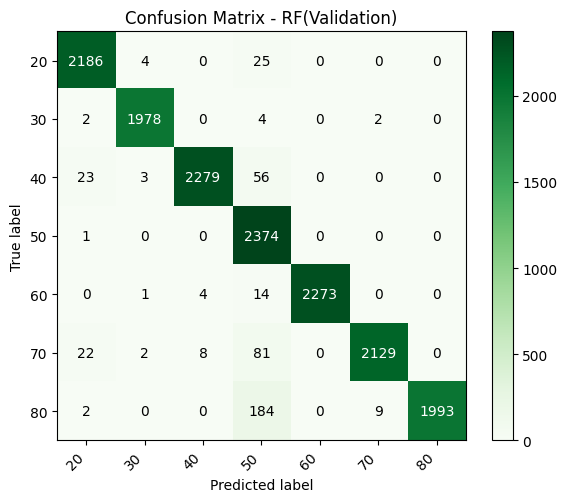

/Users/arash/anaconda3/envs/MA_Arash/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arash/anaconda3/envs/MA_Arash/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arash/anaconda3/envs/MA_Arash/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

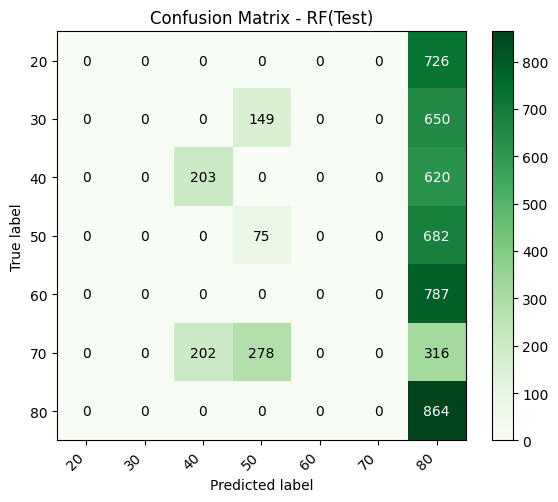

In [21]:
rf_pipeline = build_rf_pipeline(random_state=RANDOM_STATE)
rf_pipeline = train_pipeline(rf_pipeline, X_tr, y_tr)


val_metrics = compute_metrics_no_roc(rf_pipeline, X_val, y_val, n_classes, class_names)

plot_confusion_matrix(val_metrics['conf_matrix'], class_names,
                          title=f"Confusion Matrix - RF(Validation)", cmap="Greens", save_path="final_result/multi_class/rf_multi_fold0.pdf")

# Evaluate test
test_metrics = compute_metrics_no_roc(rf_pipeline, X_test, y_test, n_classes, class_names)
plot_confusion_matrix(test_metrics['conf_matrix'], class_names,
                          title=f"Confusion Matrix - RF(Test)", cmap="Greens", save_path="final_result/multi_class/rf_multi_fold0_test.pdf")